### 2x2 grid example
Illustrates the grid contruction for a 2x2 rectangular grid,  described in the documentation in detail.

In [69]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import time
import gzip
import shutil, os, sys
from os.path import dirname
import json

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


In [76]:
current_dir = (os.getcwd())
parent_dir = (dirname(os.getcwd()))

sys.path.append(parent_dir )

if 'plot_functions' in sys.modules: 
    del sys.modules['plot_functions']

from plot_functions import *



In [71]:

fname = '{0}/params.json'.format(current_dir)
all_params = json.load(open(fname))


In [72]:

core_file = '/'.join([current_dir,  'sim.pklz' ]) 
f = gzip.open(core_file,'rb')
sim = pickle.load(f) 
f.close()  

sim = pd.Series(sim)


In [73]:
sim.t_p


array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310.])

Text(0.5,1,'Hydrograph')

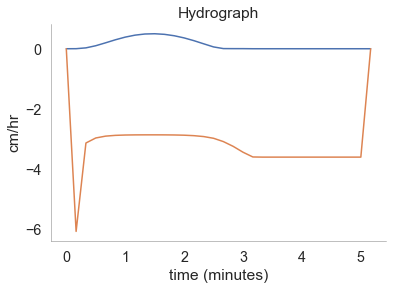

In [75]:
# plt.plot(sim['t_h']/60., sim['hydro']*3.6e3)
plt.plot(sim['t_p']/60., sim['flux1']*3.6e3)
plt.plot(sim['t_p']/60., sim['flux3']*3.6e3)
c
# plt.plot(sim['t_p']/60., sim['flux3']*3.6e3)

plt.xlabel('time (minutes)')
plt.ylabel('cm/hr')
plt.title('Hydrograph')


In [15]:
# fig = plt.figure(figsize= (15,6))
# plt.subplots_adjust(wspace = 0.3)

# for i, label in enumerate(('A', 'B', 'C')):
#     ax = plt.subplot(1,3,i+1)
#     ax.text(-0.05, 1.08, label, transform=ax.transAxes,
#       fontsize=16, fontweight='bold', va='top')

# ax1 = plt.subplot(131)
# color_topo(sim.zc, ax = ax1, dx = sim.dx)
# # veg_points(sim.isvegc, dx  = sim.dx, ax = ax1)
# # plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

# ax1 = plt.subplot(132)

# zinflplot = colormap(sim,sim['zinflc'], ax = ax1, clabel= '$I$ (cm)', colorbar = True ,
#                      cfontsize = 16, cround = 1)
# # # plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

# # ax = plt.subplot(133)
# zinflplot = colormap(sim,sim['vmax'], ax = ax, clabel= r'$U_{max}$ (cm/s)' ,colorbar = True, cfontsize = 16,
#                      cround = 1, veg_scale=False)


ValueError: slice step cannot be zero

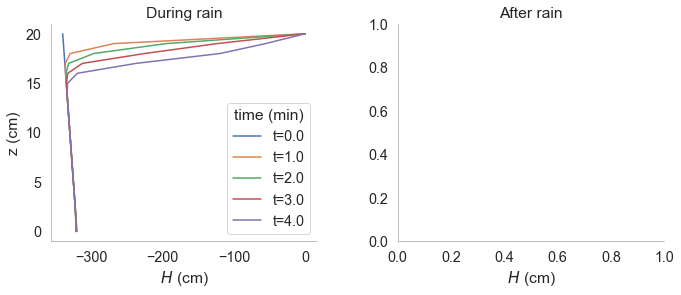

In [16]:
z = np.arange(0, sim.zmax+sim.dz, sim.dz)

fig = plt.figure(1, figsize = (11,4)); 
ax1 = plt.subplot(121)
plt.subplots_adjust(wspace = .3)
plt.xlabel('$H$ (cm)')
plt.ylabel('z (cm)')
plt.title('During rain')

inds = np.where(sim.t_p < sim.t_rain)[0]
freq = len(sim.t_p[inds])/4
for i in inds[::freq]:
    plt.plot(sim.vegH[i],z, label = 't={0}'.format(sim.t_p[i]/60), lw = 1.5)
ax1.legend(loc = 'best', title = 'time (min)')

ax2 = plt.subplot(122)
plt.xlabel('Soil moisture $cm^3/cm^3$')
plt.xlabel('$H$ (cm)')
plt.title('After rain')
inds = np.where(sim.t_p >= sim.t_rain)[0]
freq = len(sim.t_p[inds])/4
for i in inds[::freq]:
    plt.plot(sim.vegH[i],z, label = 't={0}'.format(sim.t_p[i]/60), lw = 1.5)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'time (min)')


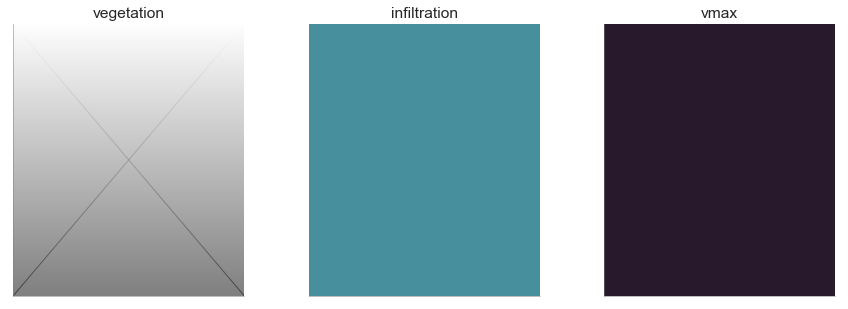

In [7]:

fig = plt.figure(figsize= (15,5))
plt.subplots_adjust(wspace = 0.2)


ax1 = plt.subplot(131)
color_topo(sim.zc, ax = ax1, dx = sim.dx)
veg_points(sim.isvegc, dx  = sim.dx, ax = ax1)
ax1.set_title('vegetation')
# plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

ax1 = plt.subplot(132)
zinflplot = colormap(sim,sim['zinflc'], ax = ax1, clabel= '$I$ (cm)', colorbar = True )
ax1.set_title('infiltration')
# plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

ax1 = plt.subplot(133)
zinflplot = colormap(sim,sim['vmax'], ax = ax1, clabel= 'velocity (cm/s)' ,
                     veg_scale=False)
ax1.set_title('vmax')

for i, label in enumerate(('veg', 'infl', 'max velocity')):
    ax = plt.subplot(1,3,i+1)
    


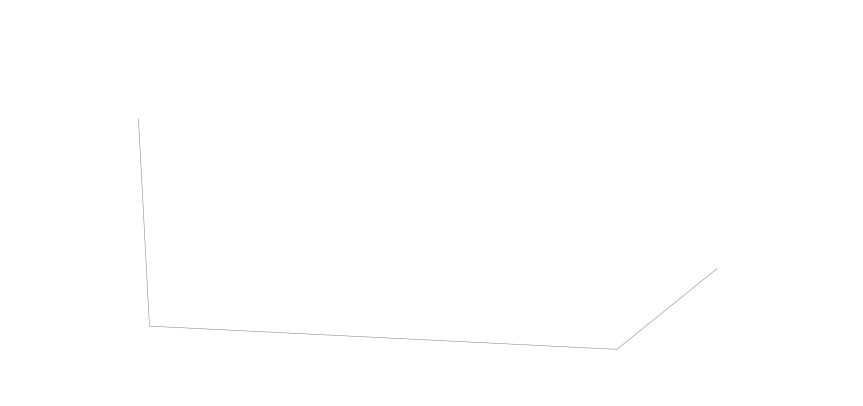

In [8]:
### Here is a 3D plot, for illustration only

fig = plt.figure( figsize = (15, 7))
ax = fig.add_subplot(111, projection='3d')

# Get rid of colored axes planes
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.set_xticks([], []);
ax.set_zticks([], []);
ax.set_yticks([], []);
# plt.axis('off')
ax.grid(False)

#Plot the surface with face colors taken from the array we made.
norm = plt.Normalize()
colors = cm.Greens(norm(sim.isvegc ))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

im = ax.scatter(sim.xc[ sim.isvegc == 1], sim.yc[ sim.isvegc == 1] ,sim.yc[ sim.isvegc == 1],
                 c = 'g',  marker='o',  s = 20, alpha =1 )
 
ax.view_init(20, 195)


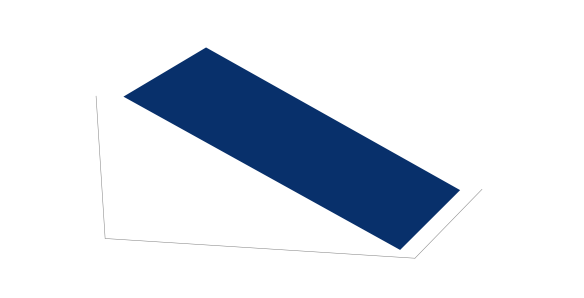

In [9]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure( figsize = (10, 5))
ax = fig.add_subplot(111, projection='3d')
# Get rid of colored axes planes
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.set_xticks([], []);
ax.set_zticks([], []);
ax.set_yticks([], []);

ax.grid(False)


# # Plot the surface with face colors taken from the array we made.
norm = plt.Normalize()
colors = cm.Blues(norm(sim.zinflc ))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

im = ax.plot_surface(sim.xc, sim.yc+1 ,sim.yc, facecolors = colors , rstride = 1, cstride = 1,
                       linewidth=0,antialiased=True, shade=False)

ax.view_init(25, 195)
